In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
import seaborn as sns
sns.distplot(titanic['Age'])

KeyError: 'Age'

In [4]:
from matplotlib import pylab
from pylab import *

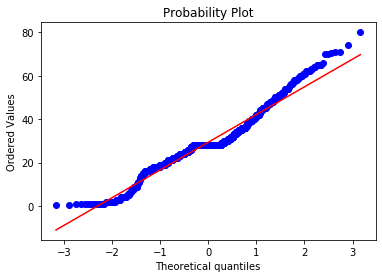

In [26]:
import scipy.stats as stats
stats.probplot(titanic['Age_med'],plot=pylab)
plt.show()

In [4]:
titanic['Age_med'] = titanic['Age'].fillna(titanic['Age'].median())

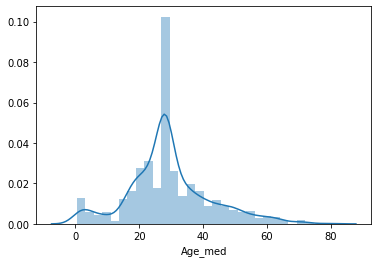

In [42]:
sns.distplot(titanic['Age_med'])

In [7]:
#check after imputation NA
print(titanic['Age'].std())
print(titanic['Age_med'].std())

14.526497332334044
13.019696550973194


AttributeError: 'AxesSubplot' object has no attribute 'get_legend_handle_labels'

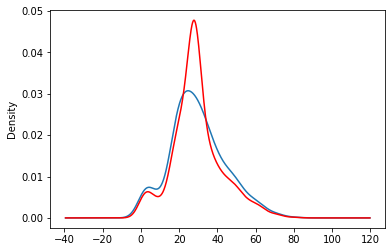

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
titanic['Age'].plot(kind = 'kde',ax = ax)
titanic['Age_med'].plot(kind = 'kde',ax = ax,color = 'Red')
lines,labels = ax.get_legend_handle_labels()
ax.legend(lines,lables,loc = 'best')


In [5]:
titanic.drop('Age',axis = 1,inplace=True)

In [6]:
titanic['Cabin'] = titanic['Cabin'].fillna('missing')

In [7]:
titanic['Cabin_missing'] = np.where(titanic['Cabin']=='missing',1,0)

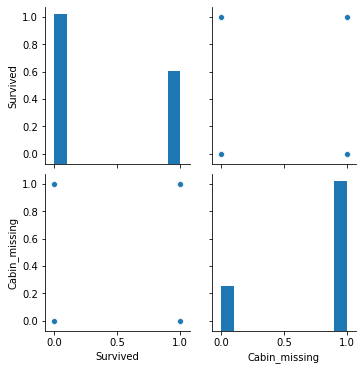

In [13]:
sns.pairplot(titanic,vars = ['Survived','Cabin_missing'])

In [8]:
#i realized after all this exploration that we can skip cabin var
titanic = titanic.drop(['Cabin','Cabin_missing'],axis = 1)

In [9]:
cols = ['Pclass', 'Sex', 'Age_med', 'SibSp', 'Parch', 'Fare','Survived']

In [10]:
titanic = titanic[cols]

In [11]:
titanic = pd.get_dummies(titanic,columns = ['Sex'],drop_first=True)

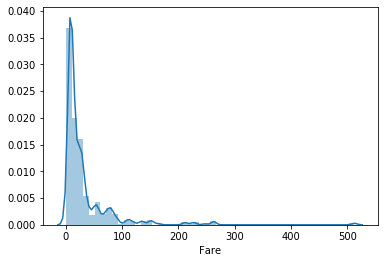

In [24]:
sns.distplot(titanic['Fare'])

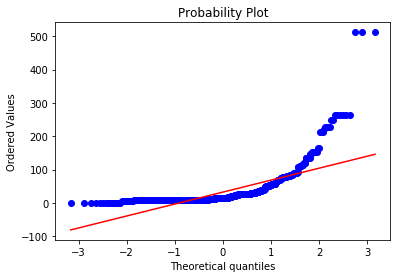

In [25]:
import scipy.stats as stats
stats.probplot(titanic['Fare'],plot=pylab)
plt.show()

In [12]:
X = titanic.drop('Survived',axis = 1)
y = titanic['Survived']

In [59]:
X_train

,Pclass,Age_med,SibSp,Parch,Fare,Sex_male
7,3,2.0,3,1,21.0750,1
765,1,51.0,1,0,77.9583,0
339,1,45.0,0,0,35.5000,1
374,3,3.0,3,1,21.0750,0
183,2,1.0,2,1,39.0000,1
...,...,...,...,...,...,...
369,1,24.0,0,0,69.3000,0
320,3,22.0,0,0,7.2500,1
527,1,28.0,0,0,221.7792,1
125,3,12.0,1,0,11.2417,1


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(X_train,y_train)

In [71]:
########## we can use log reg also as log reg gives more accuracy than Decision Trees#######
#from sklearn.linear_model  import LogisticRegression 
#logit = LogisticRegression()
#model = logit.fit(X_train,y_train)

In [72]:
y_pred = model.predict(X_test)

In [73]:
#Evaluating Model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8022388059701493


In [45]:
print(metrics.confusion_matrix(y_test,y_pred))

[[147  27]
 [ 26  68]]


In [46]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       174
           1       0.72      0.72      0.72        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

DT: ROC AUC=0.864


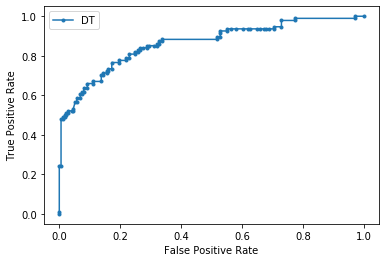

In [74]:

lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('DT: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()